**Nama : Rafa Fadil Aras**

**Kelas : TI-3G**

**NIM : 2341720007**

## **Tugas Praktikum**

### **1. Tugas KMeans**

**Membuat sebuah model K-Means**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**1. Load Data**

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


**2. Menentukan fitur untuk clustering**

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

**3. Menggunakan Elbow Method untuk cari k terbaik**

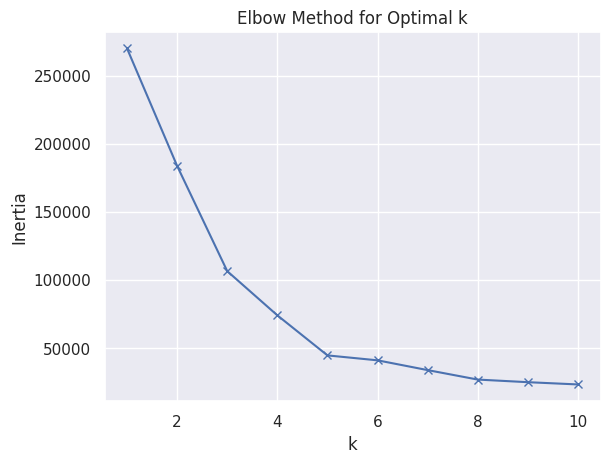

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

**4. Model K-Means dengan k terbaik**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans

**5. Visualisasi hasil clustering**

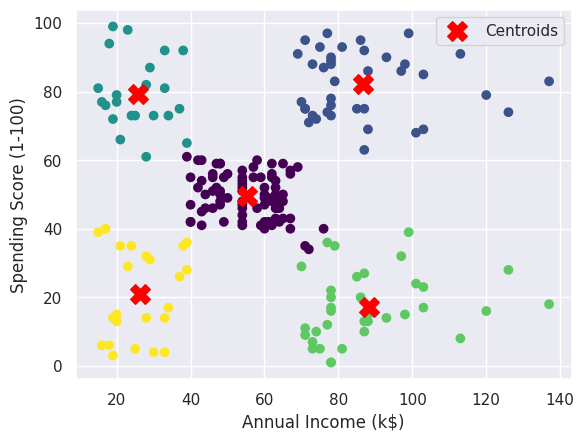

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **2. Tugas DBSCan**

**1. Generate dataset**

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import numpy as np

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

**2. DBSCAN dengan eps=0.2, min_samples=5**

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster: 2
Jumlah noise: 0


**3. Evaluasi dengan metrik**

In [ ]:
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(y, labels))
print("Completeness:", metrics.completeness_score(y, labels))
print("V-measure:", metrics.v_measure_score(y, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))
print("AMI:", metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette:", metrics.silhouette_score(X, labels))

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


**4. Visualisasi**

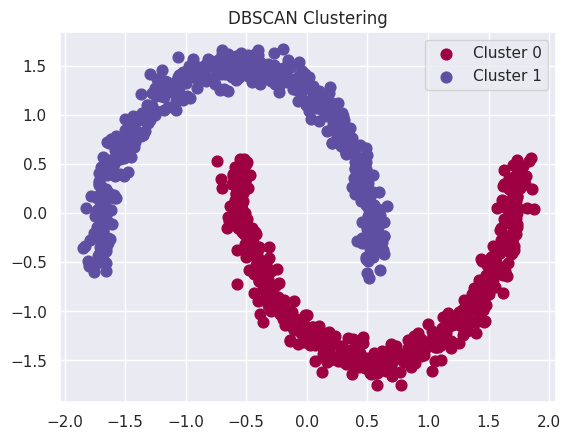

In [ ]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # noise = hitam
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=60, label=f'Cluster {k}')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='.', s=20)

plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

**5. Eksperimen**

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd

# Membuat dataset make_moons
X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

# Parameter yang diuji
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        # Hati-hati: silhouette butuh >1 cluster
        if n_clusters_ > 1:
            silhouette = metrics.silhouette_score(X, labels)
        else:
            silhouette = np.nan

        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "clusters": n_clusters_,
            "noise": n_noise_,
            "homogeneity": metrics.homogeneity_score(labels_true, labels),
            "completeness": metrics.completeness_score(labels_true, labels),
            "v_measure": metrics.v_measure_score(labels_true, labels),
            "ARI": metrics.adjusted_rand_score(labels_true, labels),
            "AMI": metrics.adjusted_mutual_info_score(labels_true, labels),
            "silhouette": silhouette
        })

# Menampilkan hasil
df_results = pd.DataFrame(results)
pd.set_option("display.max_rows", None)
print(df_results)

     eps  min_samples  clusters  noise  homogeneity  completeness  v_measure  \
0   0.05            3        69    186     0.815554      0.152548   0.257021   
1   0.05           10         3    970     0.030669      0.126764   0.049389   
2   0.05           20         0   1000     0.000000      1.000000   0.000000   
3   0.10            3         2     14     0.986207      0.902896   0.942714   
4   0.10           10         7     57     0.943317      0.409546   0.571132   
5   0.10           20         6    850     0.153928      0.155466   0.154693   
6   0.30            3         2      0     1.000000      1.000000   1.000000   
7   0.30           10         2      0     1.000000      1.000000   1.000000   
8   0.30           20         2      0     1.000000      1.000000   1.000000   
9   0.50            3         2      0     1.000000      1.000000   1.000000   
10  0.50           10         2      0     1.000000      1.000000   1.000000   
11  0.50           20         2      0  

## **Tugas Artikel**

**Artikel : Implementasi AlgoritmaDBSCAN Dalam Mengelompokan Data Pasien Terdiagnosa Penyakit GinjalKronis(PGK)**

Artikel tersebut membahas penerapan dan implementasi algoritma clustering DBSCAN untuk mengelompokkan data pasien yang didiagnosis menderita Penyakit Ginjal Kronis (PGK). Tujuannya adalah untuk menemukan pola dan pengelompokan alami dalam data medis pasien tanpa label yang ditentukan sebelumnya, serta mengidentifikasi data pasien yang dianggap sebagai pencilan (noise).

PGK adalah penyakit serius, dan dengan mengelompokkan data pasien, diharapkan dapat ditemukan struktur atau pola tersembunyi. Pengelompokan ini berpotensi membantu dalam analisis karakteristik pasien atau memahami sub-tipe dari penyakit berdasarkan data klinis yang ada.

Sumber data yang digunakan adalah dataset publik bernama "Chronic Kidney Disease" yang berasal dari UCI Machine Learning Repository. Dataset ini terdiri dari:

400 data rekam medis pasien.

24 atribut (fitur), yang mencakup data demografis dan hasil tes laboratorium seperti umur, tekanan darah, kadar gula, hemoglobin, dan lain-lain.

Metode utama yang digunakan dalam penelitian ini adalah:

Algoritma Clustering: DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

Proses: Mengikuti kerangka KDD (Knowledge Discovery in Databases) yang mencakup tahap seleksi data, pra-pemrosesan, transformasi, data mining (penerapan DBSCAN), dan evaluasi.

Metrik Jarak: Euclidean Distance digunakan untuk mengukur jarak atau kedekatan antar titik data.

Parameter Utama: Penelitian ini berfokus pada pengujian berbagai nilai parameter DBSCAN, yaitu epsilon (eps) dan MinPts (sampel minimum) untuk menemukan hasil clustering terbaik.

Kesimpulan utama dari penelitian ini adalah bahwa algoritma DBSCAN berhasil mengelompokkan data pasien PGK. Hasil terbaik diperoleh pada skenario pengujian dengan parameter:

epsilon (eps) = 3.5

MinPts = 5

Dengan konfigurasi ini, algoritma menghasilkan 2 cluster utama dan mengidentifikasi 30 data sebagai noise (pencilan). Ini menunjukkan bahwa DBSCAN mampu menemukan struktur kepadatan dalam data medis dan memisahkan pasien yang memiliki karakteristik sangat berbeda dari kelompok mayoritas.

**1. Load data**

In [ ]:
df = pd.read_csv("kidney_disease.csv")

print(df.head())
print("Jumlah data:", len(df))


   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]
Jumlah data: 400


**2. Pilih fitur (hapus id dan classification)**

In [ ]:
df_prep = df.drop(columns=["id", "classification"])

**3. Data cleaning**

In [ ]:
df_prep = df_prep.fillna(0)

**4. Transformation**

In [ ]:
mappings = {
    "rbc": {"normal": 1, "abnormal": 2, 0: 0},
    "pc": {"normal": 1, "abnormal": 2, 0: 0},
    "pcc": {"notpresent": 0, "present": 1},
    "ba": {"notpresent": 0, "present": 1},
    "htn": {"no": 0, "yes": 1},
    "dm": {"no": 0, "yes": 1},
    "cad": {"no": 0, "yes": 1},
    "appet": {"poor": 0, "good": 1},
    "pe": {"no": 0, "yes": 1},
    "ane": {"no": 0, "yes": 1},
}

for col, mapping in mappings.items():
    if col in df_prep.columns:
        df_prep[col] = df_prep[col].replace(mapping)

# Pastikan semua kolom numerik
df_prep = df_prep.apply(pd.to_numeric, errors="coerce").fillna(0)

**5. Normalisasi**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_prep)

print("Shape data setelah preprocessing:", X_scaled.shape)
print("Contoh 5 baris pertama:\n", X_scaled[:5])

Shape data setelah preprocessing: (400, 24)
Contoh 5 baris pertama:
 [[0.53333333 0.44444444 0.99512195 0.2        0.         0.
  0.5        0.         0.         0.24693878 0.09207161 0.01578947
  0.         0.         0.86516854 0.81481481 0.29545455 0.65
  1.         1.         0.         1.         0.         0.        ]
 [0.07777778 0.27777778 0.99512195 0.8        0.         0.
  0.5        0.         0.         0.         0.04603581 0.01052632
  0.         0.         0.63483146 0.7037037  0.22727273 0.
  0.         0.         0.         1.         0.         0.        ]
 [0.68888889 0.44444444 0.98536585 0.4        0.6        0.5
  0.5        0.         0.         0.86326531 0.13554987 0.02368421
  0.         0.         0.53932584 0.57407407 0.28409091 0.
  0.         1.         0.         0.         0.         1.        ]
 [0.53333333 0.38888889 0.9804878  0.8        0.         0.5
  1.         1.         0.         0.23877551 0.14322251 0.05
  0.6809816  0.05319149 0.62921348

DBSCan

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=5).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster: 1
Jumlah noise: 0
